In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [98]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [5]:
df["job"].replace({"admin.": "admin"}, inplace=True)


<ipython-input-5-a2df70548c17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [6]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45206,False
45207,False
45208,False
45209,False


In [8]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

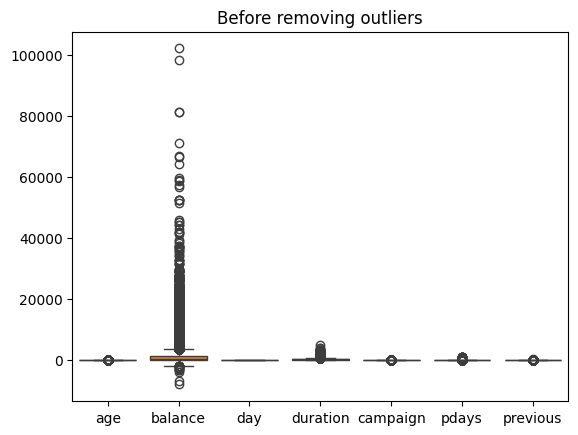

In [9]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [106]:
df.to_csv("Delimeted_Dataset.csv")

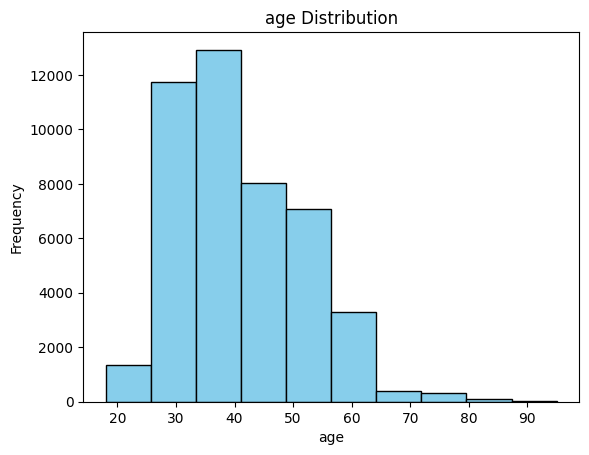

In [12]:
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


In [13]:

bins = [18, 24, 34, 49, 64, float('inf')]
labels = ['Teenagers', 'Young Adults', 'Middle-Aged Adults', 'Older Adults', 'Seniors']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels)


In [110]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,Older Adults,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,Middle-Aged Adults,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,Young Adults,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,Middle-Aged Adults,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,Young Adults,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

df['education'] = label_encoder.fit_transform(df['education'])


df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)

df.head()


In [ ]:
df.columns

In [ ]:
num=0
for col in df.columns:
    num+=1
print(num)

In [ ]:
df.to_csv("Encoded_Dataset.csv")


In [ ]:
df["education"].unique()

In [ ]:
bins = [0, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High']

df['balance'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)

label_encoder=LabelEncoder()
df['balance']=label_encoder.fit_transform(df['balance'])

df.head()
